import libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

Load and analysis data

In [4]:
df= pd.read_csv('50_Startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [6]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [7]:
r_d_mean=df['R&D Spend'].mean()
r_d_mean

73721.61559999999

In [8]:
df.loc[df['R&D Spend']==0]=r_d_mean

In [9]:
Marketing_Spend_mean=df['Marketing Spend'].mean()
Marketing_Spend_mean

213070.501224

In [10]:
df.loc[df['Marketing Spend']==0]=r_d_mean

In [11]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,77880.109848,118089.009248,216019.365848,113596.540448
std,41892.219154,28894.653759,114806.959529,36450.573246
min,1000.230000,51283.140000,1903.930000,49490.750000
25%,48693.040000,99414.682500,129300.132500,83409.080000
50%,73721.615600,120134.700000,212716.240000,106568.940000
75%,101602.800000,142990.275000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


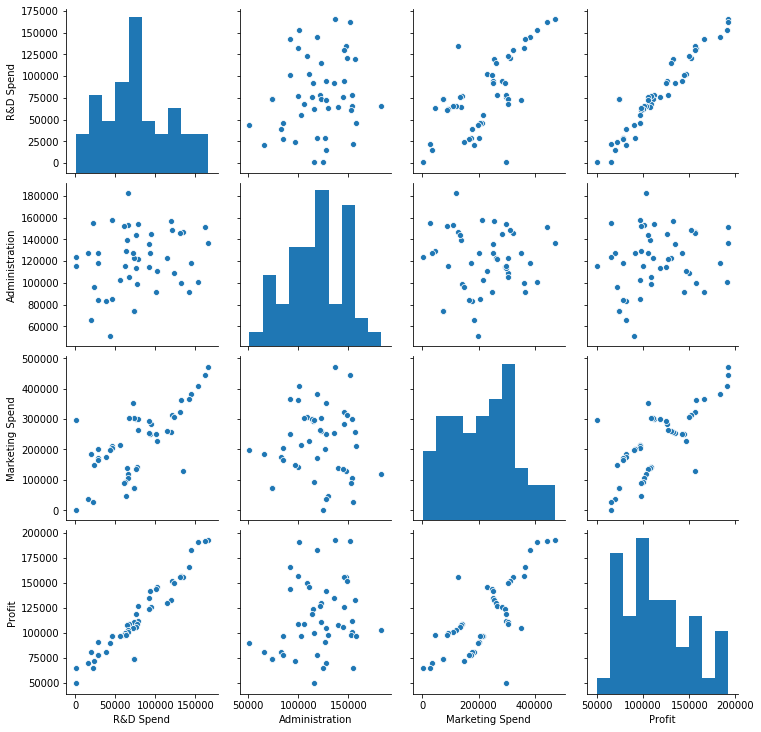

In [12]:
sns.pairplot(df)

Data Preprocessing

In [13]:
x=df[['R&D Spend','Administration','Marketing Spend']]
y=df['Profit']

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x , y , test_size=.3 , random_state=42)

Train model

In [17]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
y_hat = lr.predict(x_test)
y_hat

array([126385.43161506,  81082.10965617,  93439.57921081,  46175.45167089,
       130899.26124891,  97498.56021626, 107379.51844077, 100065.28313475,
        92185.37278064,  97498.56021626, 126932.47738223, 165561.27123548,
        84289.28459725, 150823.70348997, 170073.26537623])

In [20]:
y_test

13    134307.3500
39     81005.7600
30     99937.5900
45     64926.0800
17    125370.3700
48     73721.6156
26    105733.5400
25    107404.3400
32     97427.8400
19     73721.6156
12    141585.5200
4     166187.9400
37     89949.1400
8     152211.7700
3     182901.9900
Name: Profit, dtype: float64

Calculate R2

In [21]:
lr.score(x_train, y_train)

0.9242327472238662

In [22]:
lr.score(x_test, y_test)

0.8832861696187677

Calculate Root Mean Square Error

In [23]:
from sklearn.metrics import mean_squared_error

In [24]:
np.sqrt(mean_squared_error(y_test, y_hat))

11875.811153671388

Test Model

In [34]:
lr.predict([[120585,136986,102584]])

array([135648.96761767])

Get Model Parameters

In [29]:
lr.coef_

array([0.68302701, 0.06557204, 0.06905442])

In [31]:
lr.intercept_

37219.82500982216

In [32]:
pd.DataFrame(lr.coef_, x.columns, columns=["Coeff"])

,Coeff
R&D Spend,0.683027
Administration,0.065572
Marketing Spend,0.069054
